In [150]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from datetime import datetime
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter
import math
import matplotlib.ticker as mtick
import warnings


In [151]:
# Set options to display all rows
pd.set_option('display.max_rows', None)

# Set options to display all columns
pd.set_option('display.max_columns', None)

# Ignore warnings
warnings.filterwarnings("ignore")

In [6]:
# Load the datasets
raw_train_X = pd.read_csv("../data/raw/airbnb_train_x.csv")
raw_train_y =pd.read_csv("../data/raw/airbnb_train_y.csv")

In [7]:
raw_train_X.shape

(92067, 61)

In [8]:
raw_train_y.shape

(92067, 2)

In [9]:
raw_train_y.head()

,high_booking_rate,perfect_rating_score
0,NO,YES
1,NO,NO
2,NO,YES
3,NO,NO
4,NO,YES


In [10]:
#merging with only high_booking_rate
# Select only the 'target' column from train_y
target = raw_train_y[['high_booking_rate']]

# Merge the features with the selected target column
raw_df = pd.concat([raw_train_X, target], axis=1)

In [11]:
raw_df.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,...,availability_30,availability_60,availability_90,availability_365,first_review,license,jurisdiction_names,cancellation_policy,features,high_booking_rate
0,Perfect Apt Steps From Central Park,"Central Park Apt! 2 bedroom 1 bath, a block aw...","2 bedroom 1 bath, a block away from train, 1 b...","Central Park Apt! 2 bedroom 1 bath, a block aw...",none,Central Park North is the north side of Centra...,NaN,The apartment is just a block away from the 2/...,You'll have access to the common areas: living...,I'll be available via text throughout your sta...,...,12,42,72,72,2016-11-22,NaN,NaN,strict,"Host Has Profile Pic,Host Identity Verified,Is...",NO
1,2 bedroom Bernal Heights Condo - FABULOUS views!,"An entire lovely, comfortable, quiet and relax...","My condo is a light -filled two bedroom, one b...","An entire lovely, comfortable, quiet and relax...",none,Bernal Heights is like a village. It has been...,This condo is located on a hill and is on the ...,I will be happy to provide you with my Uber an...,As guests who are renting my entire condo whil...,I can be reached anytime by calling or texting...,...,0,0,0,0,2011-10-03,NaN,SAN FRANCISCO,strict,"Host Is Superhost,Host Has Profile Pic,Host Id...",NO
2,Zen in the Heart of Brooklyn,"Sunny room in cozy apartment close to JFK, LGA...",The apartment is located in the heart of Bushw...,"Sunny room in cozy apartment close to JFK, LGA...",none,Bushwick is an extremely hot neighborhood righ...,NaN,Our location is extremely convenient to get al...,"You will have access to the bedroom, living ro...",I have been living in this neighborhood for 4 ...,...,30,60,90,365,2015-10-13,NaN,NaN,strict,"Host Has Profile Pic,Host Identity Verified,Is...",NO
3,any term sublet night week months,NaN,hi love to host u the apt loceded in the uppe...,hi love to host u the apt loceded in the uppe...,none,NaN,NaN,NaN,NaN,NaN,...,10,33,63,338,2010-04-11,NaN,NaN,strict,"Host Has Profile Pic,Is Location Exact",NO
4,Cozy and Small bedroom in Astoria!!,"Small bedroom but comfy in Astoria, close to t...",NaN,"Small bedroom but comfy in Astoria, close to t...",none,"Astoria is a great area. Lots of bar, restaura...",NaN,NaN,NaN,NaN,...,0,1,1,17,2016-02-01,NaN,NaN,flexible,"Host Has Profile Pic,Host Identity Verified,Is...",NO


In [14]:
# Calculate fillrate for each column
fillrates = raw_df.notnull().mean().reset_index()
fillrates.columns = ['column_name', 'fillrate']


# Create the output directory if it doesn't exist
output_path = '../data/raw'
os.makedirs(output_path, exist_ok=True)

# Save to CSV
fillrates.to_csv(os.path.join(output_path, 'fillrates.csv'), index=False)

print("Fillrate CSV saved to:", os.path.join(output_path, 'fillrates.csv'))


Fillrate CSV saved to: ../data/raw/fillrates.csv


In [21]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92067 entries, 0 to 92066
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       92048 non-null  object 
 1   summary                    88816 non-null  object 
 2   space                      72442 non-null  object 
 3   description                92048 non-null  object 
 4   experiences_offered        92067 non-null  object 
 5   neighborhood_overview      62428 non-null  object 
 6   notes                      45747 non-null  object 
 7   transit                    64335 non-null  object 
 8   access                     58404 non-null  object 
 9   interaction                56661 non-null  object 
 10  house_rules                64234 non-null  object 
 11  host_name                  91898 non-null  object 
 12  host_since                 91898 non-null  object 
 13  host_location              91656 non-null  obj

## Data Preparation for Baseline Model


In [25]:
#dropping columns with less than 70% fillrate with the exception of 2 columns - transit and house_rules (based on domain knowledge)

drop_list = ["access",
             "host_about",
             "host_acceptance_rate",
             "interaction",
             "jurisdiction_names",
             "license",
             "monthly_price",
             "neighborhood_group",
             "neighborhood_overview",
             "notes",
             "security_deposit",
             "square_feet",
             "weekly_price"]

raw_df_2 = raw_df.drop(columns=drop_list, axis=1)

In [27]:
#lets divide the data based on categorical and numerical features

# num_features = [feature for feature in raw_df_2.columns if raw_df_2[feature].dtype in ['float64', 'int64']] 
# cat_features = [feature for feature in raw_df_2.columns if feature not in num_features]

### Some free exploration of the features

In [33]:
#experiences_offered
raw_df_2['experiences_offered'].value_counts()

#it has the same value 'none' across all rows. We will drop it for sure

experiences_offered
none    92067
Name: count, dtype: int64

In [ ]:
#name, summary, space, description are all text based data. we will add them using NLP in later stages

In [79]:
#dropping some more not-so-useful features based on domain knowledge
second_drop_list = ['name',
                    'summary',
                    'space',
                    'description',
                    'experiences_offered',
                    'host_name',
                    'host_location', 
                    'host_neighbourhood', 
                    'street', 
                    'neighborhood',
                    'state',
                    'zipcode',
                    'market',
                    'smart_location',
                    'country_code',
                    'house_rules',
                    'transit']

raw_df_3 = raw_df_2.drop(columns=second_drop_list, axis=1)

In [80]:
raw_df_3.shape

(92067, 32)

In [81]:
#lets divide the data based on categorical and numerical features

num_features = [feature for feature in raw_df_3.columns if raw_df_3[feature].dtype in ['float64', 'int64']] 
cat_features = [feature for feature in raw_df_3.columns if feature not in num_features]

In [82]:
print(num_features) #19

['host_response_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365']


In [84]:
print(cat_features) #13

['host_since', 'host_response_time', 'host_verifications', 'city', 'country', 'property_type', 'room_type', 'bed_type', 'amenities', 'first_review', 'cancellation_policy', 'features', 'high_booking_rate']


In [85]:
#lets deal with date features - host_since and first_review

# Convert date strings to datetime objects
raw_df_3['host_since'] = pd.to_datetime(raw_df_3['host_since'], errors='coerce')
raw_df_3['first_review'] = pd.to_datetime(raw_df_3['first_review'], errors='coerce')

# Get today's date
today = pd.to_datetime(datetime.today().date())

# Create new numerical features
raw_df_3['Days_since_host_joined'] = (today - raw_df_3['host_since']).dt.days
raw_df_3['Days_since_first_review'] = (today - raw_df_3['first_review']).dt.days

#drop the old features
raw_df_4 = raw_df_3.drop(columns=['host_since','first_review'], axis = 1)

num_features = ['host_response_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365','Days_since_host_joined','Days_since_first_review']
cat_features = ['host_response_time', 'host_verifications', 'city', 'country', 'property_type', 'room_type', 'bed_type', 'amenities', 'cancellation_policy', 'features', 'high_booking_rate']

In [86]:
# lets check values in country 
raw_df_4['country'].value_counts()

#All united states so has to be dropped
raw_df_4 = raw_df_4.drop(columns=['country'],axis=1)

In [87]:
cat_features = ['host_response_time', 'host_verifications', 'city', 'property_type', 'room_type', 'bed_type', 'amenities', 'cancellation_policy', 'features', 'high_booking_rate']

In [88]:
raw_df_4[cat_features].head()

,host_response_time,host_verifications,city,property_type,room_type,bed_type,amenities,cancellation_policy,features,high_booking_rate
0,within an hour,"email,phone,reviews,jumio,kba",New York,Apartment,Private room,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",strict,"Host Has Profile Pic,Host Identity Verified,Is...",NO
1,within a few hours,"email,phone,facebook,reviews,kba,work_email","Bernal Heights, San Francisco",Condominium,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",strict,"Host Is Superhost,Host Has Profile Pic,Host Id...",NO
2,NaN,"email,phone,reviews,kba",New York,Apartment,Private room,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",strict,"Host Has Profile Pic,Host Identity Verified,Is...",NO
3,within an hour,"email,phone,reviews",New York,Apartment,Entire home/apt,Real Bed,"Cable TV,Wireless Internet,Air conditioning,Po...",strict,"Host Has Profile Pic,Is Location Exact",NO
4,NaN,"email,phone,reviews,jumio,government_id",Queens,Apartment,Private room,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",flexible,"Host Has Profile Pic,Host Identity Verified,Is...",NO


In [89]:
raw_df_4.shape

(92067, 31)

For now, we will be sticking to these 30 features for our baseline models. we have removed all free text features for later NLP processing.
Next lets start dealing with multi-category features like - host_verification, amenities and features

## Dealing with Multi-Category features

Total unique amenities: 131


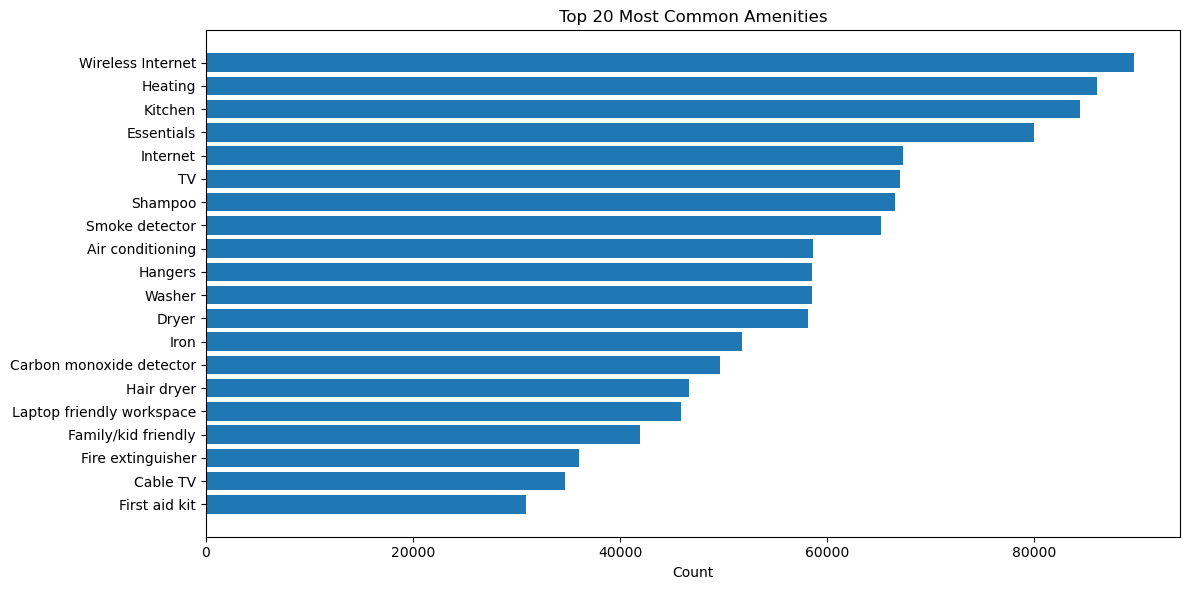

In [102]:

#Amenities

# Split and clean the amenities
amenities_series = raw_df_4['amenities'].fillna('').apply(lambda x: [a.strip() for a in x.split(',') if a.strip()])

all_amenities = set(amenity for sublist in amenities_series for amenity in sublist)
total_unique_amenities = len(all_amenities)

print(f"Total unique amenities: {total_unique_amenities}")


# Flatten the list of lists and count
all_amenities = [amenity for sublist in amenities_series for amenity in sublist]
amenity_counts = Counter(all_amenities)

# Convert to DataFrame for plotting
top_n = 20  # change this to get more or fewer
top_amenities_df = pd.DataFrame(amenity_counts.most_common(top_n), columns=['Amenity', 'Count'])

# Step 4: Plot
plt.figure(figsize=(12, 6))
plt.barh(top_amenities_df['Amenity'][::-1], top_amenities_df['Count'][::-1])
plt.xlabel('Count')
plt.title(f'Top {top_n} Most Common Amenities')
plt.tight_layout()
plt.show()

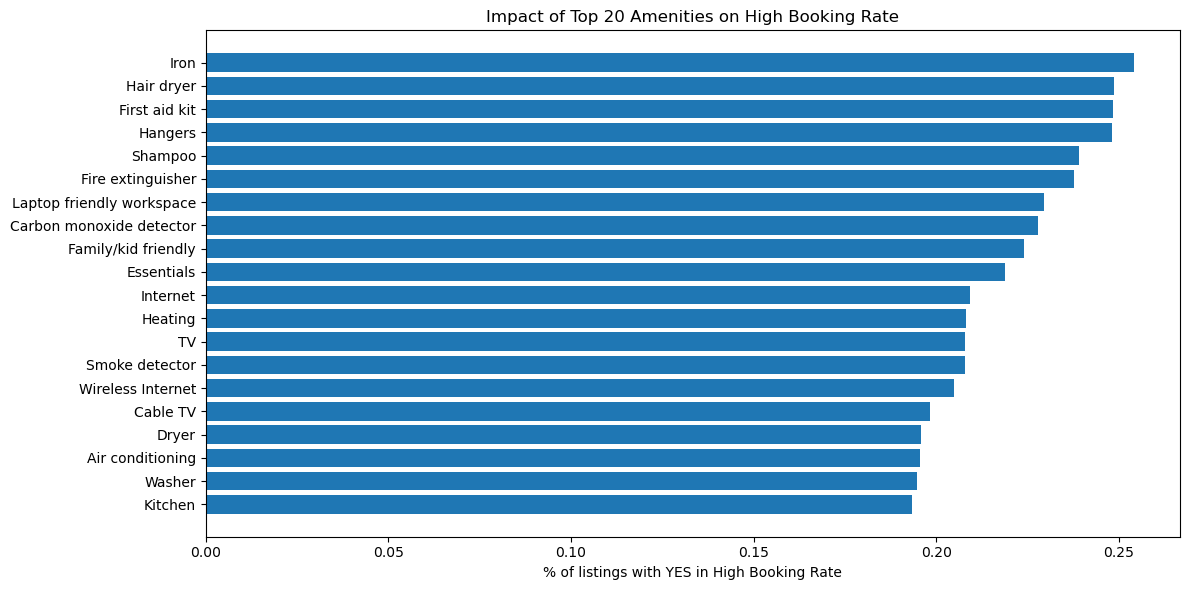

In [103]:
# Step 1: Clean and split amenities
raw_df_4['amenities_cleaned'] = raw_df_4['amenities'].fillna('').apply(lambda x: [a.strip() for a in x.split(',') if a.strip()])

# Step 2: Flatten to count top amenities
all_amenities = [amenity for sublist in raw_df_4['amenities_cleaned'] for amenity in sublist]
top_n = 20
top_amenities = [a for a, _ in Counter(all_amenities).most_common(top_n)]

# Step 3: For each amenity, compute % of listings with "YES" in high_booking_rate
impact_data = []
for amenity in top_amenities:
    has_amenity = raw_df_4['amenities_cleaned'].apply(lambda x: amenity in x)
    yes_rate = raw_df_4[has_amenity]['high_booking_rate'].value_counts(normalize=True).get('YES', 0)
    impact_data.append((amenity, yes_rate))

# Step 4: Convert to DataFrame and plot
impact_df = pd.DataFrame(impact_data, columns=['Amenity', 'HighBookingRate_Yes_Percent']).sort_values(by='HighBookingRate_Yes_Percent', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(impact_df['Amenity'][::-1], impact_df['HighBookingRate_Yes_Percent'][::-1])
plt.xlabel('% of listings with YES in High Booking Rate')
plt.title(f'Impact of Top {top_n} Amenities on High Booking Rate')
plt.tight_layout()
plt.show()

In [104]:
# Step 1: Clean and split the amenities strings into lists
raw_df_4['amenities_cleaned'] = raw_df_4['amenities'].fillna('').apply(lambda x: [a.strip() for a in x.split(',') if a.strip()])

# Step 2: Identify top 20 most frequent amenities
all_amenities = [amenity for sublist in raw_df_4['amenities_cleaned'] for amenity in sublist]
top_20_amenities = set([amenity for amenity, _ in Counter(all_amenities).most_common(20)])

# Step 3: Filter each listing's amenities to only include top 20
raw_df_4['amenities_top_20'] = raw_df_4['amenities_cleaned'].apply(lambda x: [a for a in x if a in top_20_amenities])

# Step 4: One-hot encode using only top 20
mlb = MultiLabelBinarizer()
amenities_encoded = pd.DataFrame(mlb.fit_transform(raw_df_4['amenities_top_20']),
                                 columns=[f'amenity_{a}' for a in mlb.classes_],
                                 index=raw_df_4.index)

# Step 5: Merge into final dataframe and drop unused columns
raw_df_5 = pd.concat([raw_df_4.drop(columns=['amenities', 'amenities_cleaned', 'amenities_top_20']), amenities_encoded], axis=1)

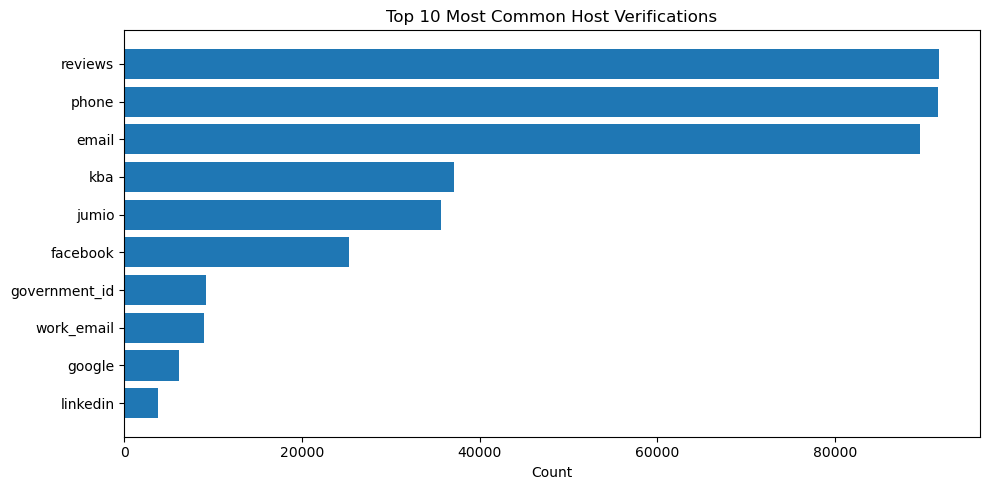

In [110]:
#host_verifications
# Clean and split the string into list
raw_df_5['host_verifications_cleaned'] = raw_df_5['host_verifications'].fillna('').apply(
    lambda x: [v.strip() for v in x.split(',') if v.strip()]
)

# Flatten the list and count frequency
all_verifications = [v for sublist in raw_df_5['host_verifications_cleaned'] for v in sublist]
top_n = 10
top_verifications = Counter(all_verifications).most_common(top_n)

# Convert to DataFrame for plotting
verif_df = pd.DataFrame(top_verifications, columns=['Verification', 'Count'])

# Plot
plt.figure(figsize=(10, 5))
plt.barh(verif_df['Verification'][::-1], verif_df['Count'][::-1])
plt.title(f'Top {top_n} Most Common Host Verifications')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


In [111]:
# Get just the top N verification methods
top_verif_set = set([v for v, _ in top_verifications])

# Keep only top N in each row
raw_df_5['host_verifications_top'] = raw_df_5['host_verifications_cleaned'].apply(
    lambda x: [v for v in x if v in top_verif_set]
)

# One-hot encode
mlb = MultiLabelBinarizer()
verif_encoded = pd.DataFrame(
    mlb.fit_transform(raw_df_5['host_verifications_top']),
    columns=[f'verif_{v}' for v in mlb.classes_],
    index=raw_df_5.index
)

# Merge with main DataFrame
raw_df_6 = pd.concat(
    [raw_df_5.drop(columns=['host_verifications', 'host_verifications_cleaned', 'host_verifications_top']),
     verif_encoded],
    axis=1
)

,host_response_time,host_response_rate,host_listings_count,host_total_listings_count,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,cancellation_policy,features,high_booking_rate,Days_since_host_joined,Days_since_first_review,amenity_Air conditioning,amenity_Cable TV,amenity_Carbon monoxide detector,amenity_Dryer,amenity_Essentials,amenity_Family/kid friendly,amenity_Fire extinguisher,amenity_First aid kit,amenity_Hair dryer,amenity_Hangers,amenity_Heating,amenity_Internet,amenity_Iron,amenity_Kitchen,amenity_Laptop friendly workspace,amenity_Shampoo,amenity_Smoke detector,amenity_TV,amenity_Washer,amenity_Wireless Internet,verif_email,verif_facebook,verif_google,verif_government_id,verif_jumio,verif_kba,verif_linkedin,verif_phone,verif_reviews,verif_work_email
0,within an hour,100.0,2,2.0,New York,40.801020,-73.954007,Apartment,Private room,2.0,1.0,2.0,1.0,Real Bed,70.0,10.0,1,0,3,1125,12,42,72,72,strict,"Host Has Profile Pic,Host Identity Verified,Is...",NO,3565.0,3057,1,0,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0
1,within a few hours,100.0,2,2.0,"Bernal Heights, San Francisco",37.745306,-122.411218,Condominium,Entire home/apt,4.0,1.0,2.0,2.0,Real Bed,250.0,125.0,2,20,5,29,0,0,0,0,strict,"Host Is Superhost,Host Has Profile Pic,Host Id...",NO,5795.0,4934,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,1,1,1
2,NaN,NaN,2,2.0,New York,40.701036,-73.918769,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,100.0,20.0,1,0,3,1125,30,60,90,365,strict,"Host Has Profile Pic,Host Identity Verified,Is...",NO,3729.0,3463,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,1,0
3,within an hour,100.0,2,2.0,New York,40.771044,-73.956285,Apartment,Entire home/apt,6.0,1.0,1.0,1.0,Real Bed,185.0,85.0,2,20,1,365,10,33,63,338,strict,"Host Has Profile Pic,Is Location Exact",NO,5639.0,5474,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0
4,NaN,NaN,1,1.0,Queens,40.760605,-73.917666,Apartment,Private room,1.0,1.0,1.0,1.0,Real Bed,35.0,NaN,1,0,1,1125,0,1,1,17,flexible,"Host Has Profile Pic,Host Identity Verified,Is...",NO,3762.0,3352,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,1,0,0,1,1,0,0,1,1,0


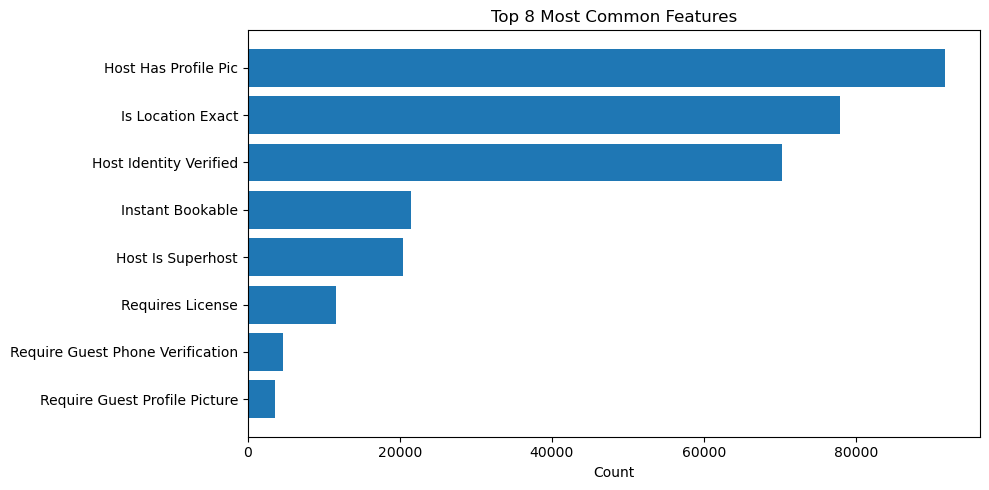

In [115]:
#features
# Clean and split
raw_df_6['features_cleaned'] = raw_df_6['features'].fillna('').apply(
    lambda x: [f.strip() for f in x.split(',') if f.strip()]
)

# Flatten and count
all_features = [f for sublist in raw_df_6['features_cleaned'] for f in sublist]
top_n = 8
top_features = Counter(all_features).most_common(top_n)

# Convert to DataFrame and plot
feat_df = pd.DataFrame(top_features, columns=['Feature', 'Count'])

plt.figure(figsize=(10, 5))
plt.barh(feat_df['Feature'][::-1], feat_df['Count'][::-1])
plt.title(f'Top {top_n} Most Common Features')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [116]:

# Get top N as a set
top_feature_set = set([f for f, _ in top_features])

# Filter each row to retain only top N
raw_df_6['features_top'] = raw_df_6['features_cleaned'].apply(
    lambda x: [f for f in x if f in top_feature_set]
)

# One-hot encode
mlb = MultiLabelBinarizer()
features_encoded = pd.DataFrame(
    mlb.fit_transform(raw_df_6['features_top']),
    columns=[f'feature_{f}' for f in mlb.classes_],
    index=raw_df_6.index
)

# Final merge and cleanup
raw_df_7 = pd.concat(
    [raw_df_6.drop(columns=['features', 'features_cleaned', 'features_top']),
     features_encoded],
    axis=1
)

In [117]:
raw_df_7.head()

,host_response_time,host_response_rate,host_listings_count,host_total_listings_count,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,cancellation_policy,high_booking_rate,Days_since_host_joined,Days_since_first_review,amenity_Air conditioning,amenity_Cable TV,amenity_Carbon monoxide detector,amenity_Dryer,amenity_Essentials,amenity_Family/kid friendly,amenity_Fire extinguisher,amenity_First aid kit,amenity_Hair dryer,amenity_Hangers,amenity_Heating,amenity_Internet,amenity_Iron,amenity_Kitchen,amenity_Laptop friendly workspace,amenity_Shampoo,amenity_Smoke detector,amenity_TV,amenity_Washer,amenity_Wireless Internet,verif_email,verif_facebook,verif_google,verif_government_id,verif_jumio,verif_kba,verif_linkedin,verif_phone,verif_reviews,verif_work_email,feature_Host Has Profile Pic,feature_Host Identity Verified,feature_Host Is Superhost,feature_Instant Bookable,feature_Is Location Exact,feature_Require Guest Phone Verification,feature_Require Guest Profile Picture,feature_Requires License
0,within an hour,100.0,2,2.0,New York,40.801020,-73.954007,Apartment,Private room,2.0,1.0,2.0,1.0,Real Bed,70.0,10.0,1,0,3,1125,12,42,72,72,strict,NO,3565.0,3057,1,0,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0
1,within a few hours,100.0,2,2.0,"Bernal Heights, San Francisco",37.745306,-122.411218,Condominium,Entire home/apt,4.0,1.0,2.0,2.0,Real Bed,250.0,125.0,2,20,5,29,0,0,0,0,strict,NO,5795.0,4934,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,1,1,1,1,1,1,0,1,1,1,0
2,NaN,NaN,2,2.0,New York,40.701036,-73.918769,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,100.0,20.0,1,0,3,1125,30,60,90,365,strict,NO,3729.0,3463,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0
3,within an hour,100.0,2,2.0,New York,40.771044,-73.956285,Apartment,Entire home/apt,6.0,1.0,1.0,1.0,Real Bed,185.0,85.0,2,20,1,365,10,33,63,338,strict,NO,5639.0,5474,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0
4,NaN,NaN,1,1.0,Queens,40.760605,-73.917666,Apartment,Private room,1.0,1.0,1.0,1.0,Real Bed,35.0,NaN,1,0,1,1125,0,1,1,17,flexible,NO,3762.0,3352,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,1,0,0,1,1,0,0,1,1,0,1,1,0,0,1,0,0,0


In [118]:
raw_df_7.shape

(92067, 66)

## Dealing with simple categorical features

In [122]:
#removing spaces from column names
raw_df_7.columns = raw_df_7.columns.str.replace(' ', '_').str.lower()

In [138]:
raw_df_7['high_booking_rate'] = raw_df_7['high_booking_rate'].map({'YES': 1, 'NO': 0})



In [153]:
num_features = [feature for feature in raw_df_7.columns if raw_df_7[feature].dtype in ['float64', 'int64']] 
cat_features = [feature for feature in raw_df_7.columns if feature not in num_features]

In [155]:
cat_features

['host_response_time',
 'city',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy']

In [158]:
raw_df_7['high_booking_rate'].value_counts()

high_booking_rate
0    73405
1    18662
Name: count, dtype: int64

We can see that the data is highly imbalanced in the target variable. This might affect the model drastically

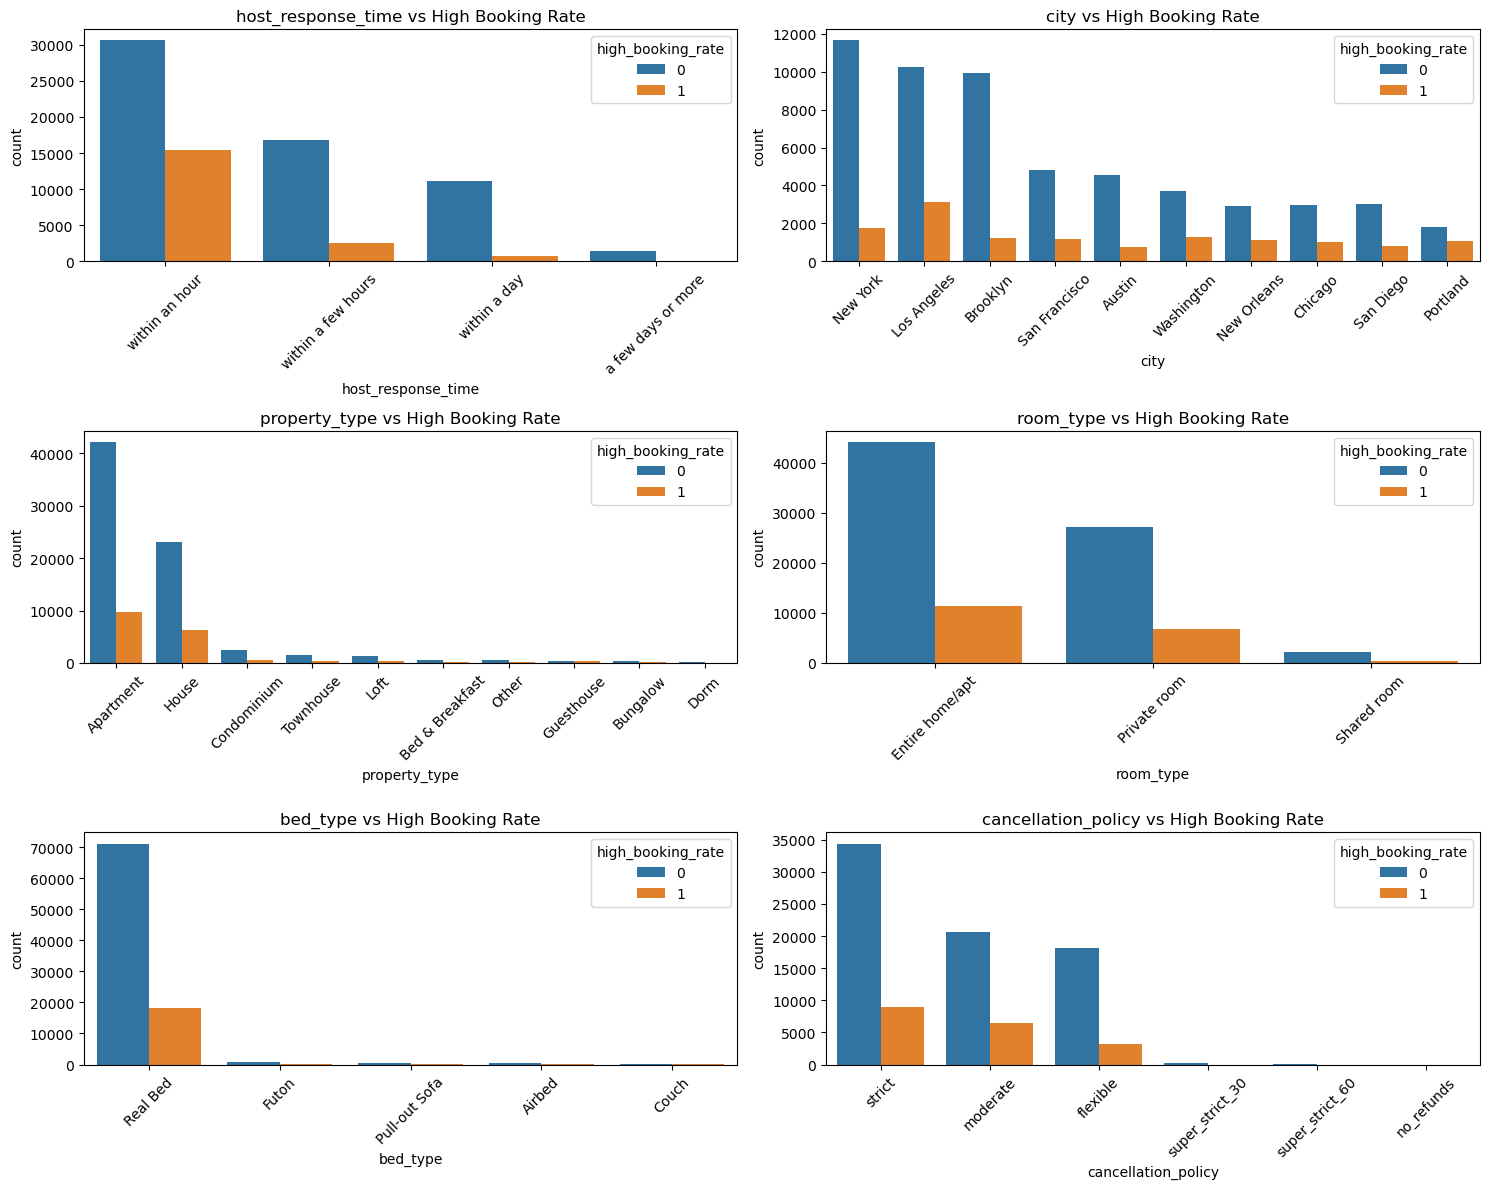

In [156]:

# Update this list if needed
n_features = len(cat_features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    sns.countplot(data=raw_df_7, x=feature, hue='high_booking_rate',
                  order=raw_df_7[feature].value_counts().index[:10], ax=axes[i])
    axes[i].set_title(f'{feature} vs High Booking Rate')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [159]:
no_high_booking_rate = raw_df_7[raw_df_7['high_booking_rate'] == 0 ]
yes_high_booking_rate = raw_df_7[raw_df_7['high_booking_rate'] == 1]

def bivariate_analysis(column_name, ax):
    # Calculate counts for stroke = 1
    positive = yes_high_booking_rate[column_name].value_counts().reset_index()
    positive.columns = [column_name, "count"]  
    positive["Percentage"] = positive["count"] / positive["count"].sum() * 100
    
    # Calculate counts for stroke = 0
    negative = no_high_booking_rate[column_name].value_counts().reset_index()
    negative.columns = [column_name, "count"]  
    negative["Percentage"] = negative["count"] / negative["count"].sum() * 100
    
    # Plot horizontal bar chart on the provided axis
    ax.barh(positive[column_name], positive["Percentage"], color="teal", label='high_booking_rate = 1', height=0.7)
    ax.barh(negative[column_name], negative["Percentage"], color="blue", label='high_booking_rate = 0', height=0.3)
    
    # Format x-axis as percentage
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.xaxis.set_major_locator(mtick.MultipleLocator(10))
    
    # Add titles and labels
    ax.set_title(f"{column_name} Distribution by high_booking_rate", fontsize=10)
    ax.set_xlabel('Percentage', fontsize=8)
    ax.set_ylabel(column_name, fontsize=8)
    ax.legend(title='high_booking_rate Status', fontsize=8, loc='upper right')
    
    # Add grid
    ax.grid(axis='x', linestyle='--', alpha=0.6, zorder=0)

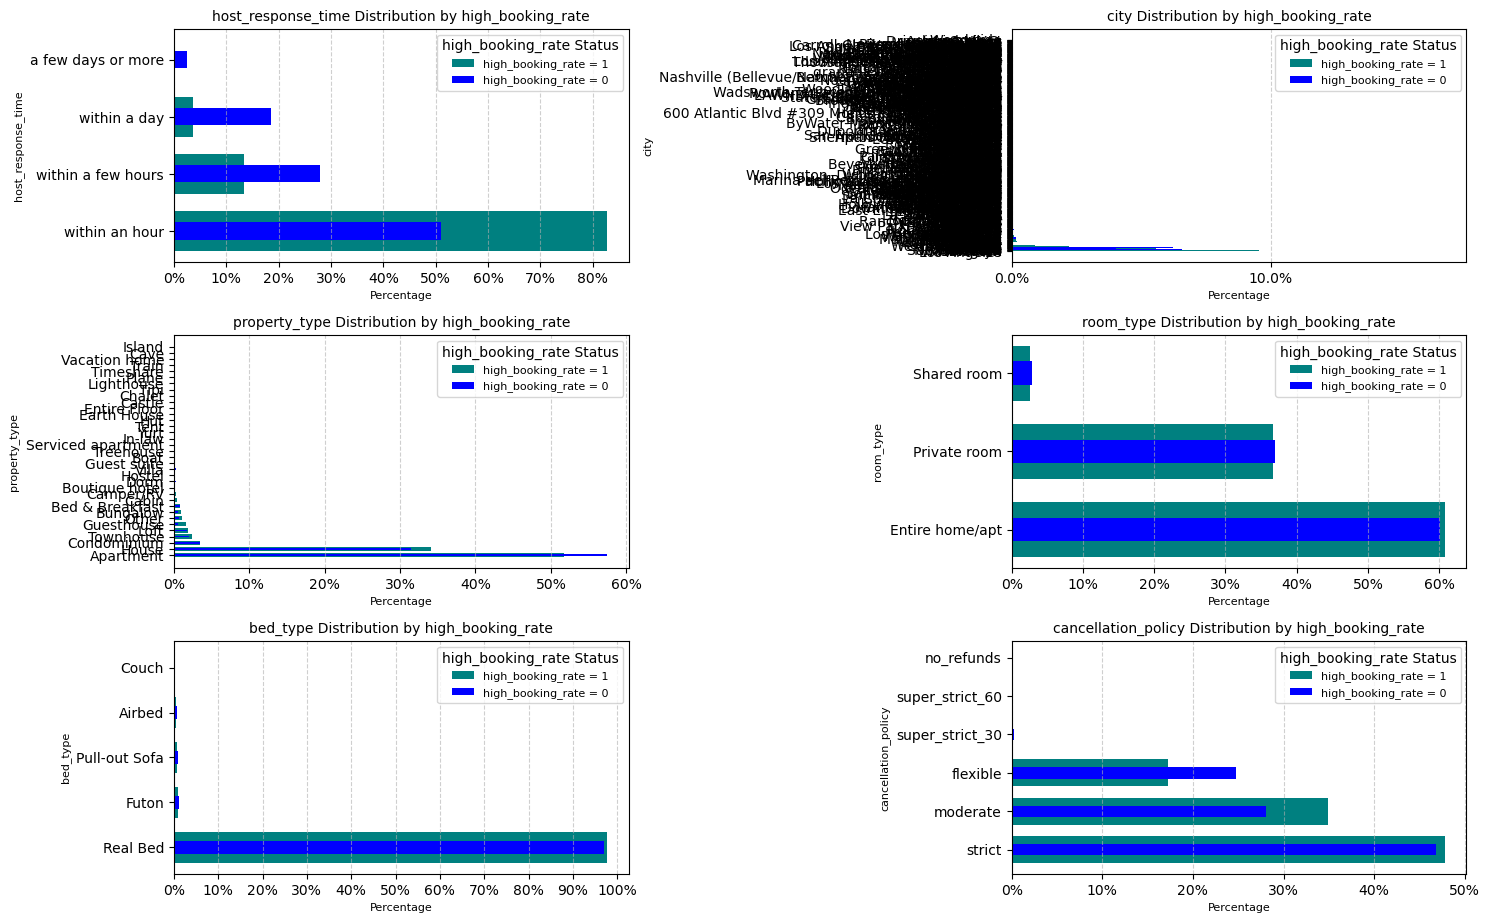

In [160]:
plt.figure(figsize=(15, 12))  

for i, var in enumerate(cat_features, 1):
    plt.subplot(4, 2, i)  
    ax = plt.gca()
    bivariate_analysis(var, ax)

plt.tight_layout()
plt.show()


### Observations
1. Cancellation Policy
- Contrary to what you might expect, strict cancellation policies don't harm booking performance — in fact, high-performing listings often use them.
    * Strict policies ≠ fewer bookings
    * Possibly, strict listings compensate with better location, amenities, or reliability

2. room_type
- Entire home/apt dominates in both groups:
    * But it's slightly more dominant among high booking rate listings (~60%)
    * Suggests that full homes tend to attract more bookings.
- Private rooms are second most common — equally distributed in both groups, maybe a neutral indicator.
- Shared rooms are rare overall, and don’t seem to correlate strongly with high bookings.

3. host_response_time
- "Within an hour" is a dominant response time for high-performing listings
    * Almost 80%+ of listings with high booking rate have hosts who respond within an hour.
    * That's a massive signal — probably one of my strongest features so far.
- "Within a few hours" and "within a day" are more common in listings with lower booking rate (0).
- "A few days or more" is almost exclusively associated with low booking rate — and it makes sense. If a host takes days to respond, it’s a big turn-off for users.

In [187]:
# host_response_time
# Define ordinal mapping
response_time_mapping = {
    "within an hour": 3,
    "within a few hours": 2,
    "within a day": 1,
    "a few days or more": 0
}

# Apply mapping
raw_df_7['host_response_time_encoded'] = raw_df_7['host_response_time'].map(response_time_mapping)

raw_df_8 = raw_df_7.copy()

In [188]:
raw_df_8.drop(columns=['host_response_time'], inplace=True)

In [189]:
# bed_type
raw_df_8['bed_type'].value_counts()


bed_type
Real Bed         89426
Futon             1064
Pull-out Sofa      748
Airbed             544
Couch              285
Name: count, dtype: int64

In [190]:
# bed_type
raw_df_8['bed_type_encoded'] = raw_df_8['bed_type'].apply(lambda x: 1 if x == 'Real Bed' else 0)
raw_df_8.drop(columns=['bed_type'], inplace=True)

In [191]:
#property_type
raw_df_8['property_type'].value_counts()


property_type
Apartment             51807
House                 29440
Condominium            3163
Townhouse              1927
Loft                   1638
Bed & Breakfast         761
Other                   736
Guesthouse              697
Bungalow                541
Dorm                    230
Villa                   201
Cabin                   188
Camper/RV               160
Boutique hotel          105
Hostel                   91
Boat                     81
Timeshare                76
Guest suite              44
Tent                     31
Serviced apartment       26
Treehouse                25
Castle                   14
In-law                   12
Chalet                   10
Hut                      10
Yurt                      9
Earth House               9
Entire Floor              6
Tipi                      6
Cave                      5
Lighthouse                5
Vacation home             5
Island                    2
Train                     2
Plane                     1
Name: 

In [192]:
#property_type

property_type_mapping = {
    'Other': 0,
    'Condominium': 1,
    'Townhouse': 2,
    'Loft': 3,
    'House': 4,
    'Apartment': 5
}

raw_df_8['property_type_encoded'] = raw_df_8['property_type'].apply(
    lambda x: x if x in property_type_mapping else 'Other'
)

raw_df_8['property_type_encoded'] = raw_df_8['property_type_encoded'].map(property_type_mapping)


raw_df_8.drop(columns=['property_type'], inplace=True)

In [194]:
# room_type
raw_df_8['room_type'].value_counts()

room_type
Entire home/apt    55507
Private room       33970
Shared room         2590
Name: count, dtype: int64

In [195]:
# room_type

# One-hot encode with drop_first=True
room_type_dummies = pd.get_dummies(raw_df_8['room_type'], prefix='room_type', drop_first=True)

# Convert boolean to int (True → 1, False → 0)
room_type_dummies = room_type_dummies.astype(int)

# Add to dataframe and drop original
raw_df_8 = pd.concat([raw_df_8, room_type_dummies], axis=1)
raw_df_8.drop(columns=['room_type'], inplace=True)

In [197]:
#removing spaces from column names
raw_df_8.columns = raw_df_8.columns.str.replace(' ', '_').str.lower()

In [198]:

#cancellation_policy

# Define rare policies
rare_policies = ['no_refunds', 'super_strict_30', 'super_strict_60']

# Replace rare with 'other'
raw_df_8['cancellation_policy_clean'] = raw_df_8['cancellation_policy'].apply(
    lambda x: 'other' if x in rare_policies else x
)

# Apply manual ordinal encoding
cancellation_policy_mapping = {
    'other': 0,
    'flexible': 1,
    'moderate': 2,
    'strict': 3
}

raw_df_8['cancellation_policy_encoded'] = raw_df_8['cancellation_policy_clean'].map(cancellation_policy_mapping)

# Optional: drop intermediate/old columns
raw_df_8.drop(columns=['cancellation_policy', 'cancellation_policy_clean'], inplace=True)


In [199]:
#city 
raw_df_8.city.value_counts()

city
New York                                            13425
Los Angeles                                         13366
Brooklyn                                            11164
San Francisco                                        5983
Austin                                               5316
Washington                                           4986
New Orleans                                          4046
Chicago                                              3988
San Diego                                            3814
Portland                                             2903
Seattle                                              2850
Nashville                                            2471
Boston                                               2356
Denver                                               1764
Queens                                               1763
Oakland                                              1076
Long Beach                                            715
Santa Mon

In [202]:
# Fixing extreme skew + noise (like "brooklyn", "Brooklyn", "BROOKLYN")
raw_df_8['city_clean'] = raw_df_8['city'].str.strip().str.lower()

# Step 2: Get top 10 cities by frequency
top_10_cities = raw_df_8['city_clean'].value_counts().head(10).index.tolist()

# Step 3: Group all other cities under 'other'
raw_df_8['city_grouped'] = raw_df_8['city_clean'].apply(lambda x: x if x in top_10_cities else 'other')

# Step 4: One-hot encode (drop_first to avoid dummy trap) and convert to 0/1
city_dummies = pd.get_dummies(raw_df_8['city_grouped'], prefix='city', drop_first=True).astype(int)

# Step 5: Combine and clean up
raw_df_8 = pd.concat([raw_df_8, city_dummies], axis=1)
raw_df_8.drop(columns=['city', 'city_clean', 'city_grouped'], inplace=True)

In [203]:
raw_df_8.head()

,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,high_booking_rate,days_since_host_joined,days_since_first_review,amenity_air_conditioning,amenity_cable_tv,amenity_carbon_monoxide_detector,amenity_dryer,amenity_essentials,amenity_family/kid_friendly,amenity_fire_extinguisher,amenity_first_aid_kit,amenity_hair_dryer,amenity_hangers,amenity_heating,amenity_internet,amenity_iron,amenity_kitchen,amenity_laptop_friendly_workspace,amenity_shampoo,amenity_smoke_detector,amenity_tv,amenity_washer,amenity_wireless_internet,verif_email,verif_facebook,verif_google,verif_government_id,verif_jumio,verif_kba,verif_linkedin,verif_phone,verif_reviews,verif_work_email,feature_host_has_profile_pic,feature_host_identity_verified,feature_host_is_superhost,feature_instant_bookable,feature_is_location_exact,feature_require_guest_phone_verification,feature_require_guest_profile_picture,feature_requires_license,host_response_time_encoded,bed_type_encoded,property_type_encoded,room_type_private_room,room_type_shared_room,cancellation_policy_encoded,city_brooklyn,city_chicago,city_los angeles,city_new orleans,city_new york,city_other,city_portland,city_san diego,city_san francisco,city_washington
0,100.0,2,2.0,40.801020,-73.954007,2.0,1.0,2.0,1.0,70.0,10.0,1,0,3,1125,12,42,72,72,0,3565.0,3057,1,0,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,3.0,1,5,1,0,3,0,0,0,0,1,0,0,0,0,0
1,100.0,2,2.0,37.745306,-122.411218,4.0,1.0,2.0,2.0,250.0,125.0,2,20,5,29,0,0,0,0,0,5795.0,4934,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,1,1,1,1,1,1,0,1,1,1,0,2.0,1,1,0,0,3,0,0,0,0,0,1,0,0,0,0
2,NaN,2,2.0,40.701036,-73.918769,2.0,1.0,1.0,1.0,100.0,20.0,1,0,3,1125,30,60,90,365,0,3729.0,3463,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,NaN,1,5,1,0,3,0,0,0,0,1,0,0,0,0,0
3,100.0,2,2.0,40.771044,-73.956285,6.0,1.0,1.0,1.0,185.0,85.0,2,20,1,365,10,33,63,338,0,5639.0,5474,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,3.0,1,5,0,0,3,0,0,0,0,1,0,0,0,0,0
4,NaN,1,1.0,40.760605,-73.917666,1.0,1.0,1.0,1.0,35.0,NaN,1,0,1,1125,0,1,1,17,0,3762.0,3352,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,1,0,0,1,1,0,0,1,1,0,1,1,0,0,1,0,0,0,NaN,1,5,1,0,1,0,0,0,0,0,1,0,0,0,0


##### ----------- Completed encoding of all Categorical Features -------------------

In [206]:
#output this data into a csv as train_data_proccessed_1
raw_df_8.to_csv('../data/processed/train_data_processed_1.csv', index=False)